<a href="https://colab.research.google.com/github/leobioinf0/233_Introduccion_a_la_ciencia_de_datos/blob/main/4_3_ORDENAR_Y_AGRUPAR_DATOS_NO_DISPONIBLES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 4.3 ORDENAR Y AGRUPAR DATOS NO DISPONIBLES

En este artículo, empezaremos descubriendo una nueva función que nos permitirá generar  una serie de datos agrupados en torno a los valores de una columna. El primer paso, como es  habitual, es cargar la librería y crear un nuevo objeto con la base de datos que hemos usado  en la artículo anterior: 

In [1]:
import pandas as pd 
data_frame = pd.read_csv('insurance.csv') 

Vamos a ver cómo se distribuyen los valores de region:

In [2]:
data_frame.groupby('region').size()

region
northeast    324
northwest    325
southeast    364
southwest    325
dtype: int64

Aquí vemos cuántas observaciones tienen cada una de las diferentes regiones de la tabla madre.  
Si queremos ver cuál es el valor máximo de bmi para cada región, hacemos:

In [3]:
data_frame.groupby('region')['bmi'].max()

region
northeast    48.07
northwest    42.94
southeast    53.13
southwest    47.60
Name: bmi, dtype: float64

Y, si queremos saber la media de bmi para cada región, tecleamos:

In [4]:
data_frame.groupby('region')['bmi'].mean()

region
northeast    29.173503
northwest    29.199785
southeast    33.355989
southwest    30.596615
Name: bmi, dtype: float64

Aquí, vemos que la media de valores de bmi más elevada la encontramos en la región  southeast y la más baja en la northeast.  

Tenemos la opción de generar la lista de estas medias de manera ordenada. Lo podemos  hacer con la función sorted(). El código sería este: 

In [5]:
sorted(data_frame.groupby('region')['bmi'].mean())

[29.17350308641976, 29.199784615384626, 30.59661538461538, 33.35598901098903]

La lista que obtendríamos sería: 

[29.17350308641976, 29.199784615384626, 30.59661538461538,33.35598901098903] 

Ahora, haremos una agrupación más compleja. Mostraremos las medias de los precios de las  pólizas agrupadas, en un primer nivel, por la región y, en un segundo nivel, por la variable  smoker. Este es el código:

In [6]:
data_frame.groupby(['region', 'smoker'])['charges'].mean()

region     smoker
northeast  no         9165.531672
           yes       29673.536473
northwest  no         8556.463715
           yes       30192.003182
southeast  no         8032.216309
           yes       34844.996824
southwest  no         8019.284513
           yes       32269.063494
Name: charges, dtype: float64

Vemos claramente que, independientemente de la región, la media de precios siempre es  más alta, si la persona es fumadora, que cuando no lo es. 

Si ahora mantenemos la agrupación de la región, pero cambiamos la variable smoker por sex en el segundo nivel de la agrupación, necesitamos solo hacer este pequeño cambio:

In [7]:
data_frame.groupby(['region', 'sex'])['charges'].mean()

region     sex   
northeast  female    12953.203151
           male      13854.005374
northwest  female    12479.870397
           male      12354.119575
southeast  female    13499.669243
           male      15879.617173
southwest  female    11274.411264
           male      13412.883576
Name: charges, dtype: float64

Vemos que, en todas las regiones, excepto en southwest, la media de precios es más alta  para los hombres que para las mujeres.  
Si asignamos esta agrupación a una nueva variable y aplicamos la función plot.bar(),  obtendremos una gráfica de barras coherente con la agrupación:

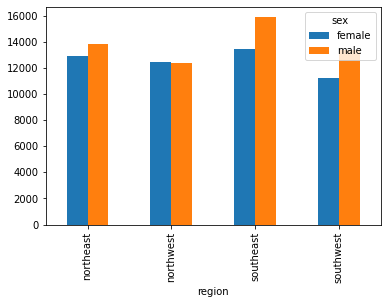

In [8]:
group = data_frame.groupby(['region', 'sex'])['charges'].mean() 
group.unstack(fill_value=0).plot.bar()

El gráfico muestra, de una manera mucho más visual, lo que la tabla de arriba nos decía.  
Si, dada la base de datos data_frame, queremos mostrarla de manera ordenada según los  valores de una variable determinada, solo tenemos que usar la función sort_values(). Lo  haremos así:

In [9]:
data_frame.sort_values(['age','bmi'])

,age,sex,bmi,children,smoker,region,charges
172,18,male,15.960,0,no,northeast,1694.79640
250,18,male,17.290,2,yes,northeast,12829.45510
359,18,female,20.790,0,no,southeast,1607.51010
1212,18,male,21.470,0,no,northeast,1702.45530
1033,18,male,21.565,0,yes,northeast,13747.87235
...,...,...,...,...,...,...,...
603,64,female,39.050,3,no,southeast,16085.12750
418,64,male,39.160,1,no,southeast,14418.28040
199,64,female,39.330,0,no,northeast,14901.51670
768,64,female,39.700,0,no,southwest,14319.03100


Si queremos mostrar solo los primeros 12 registros de este orden, tendremos que aplicar la  función head() y especificar el número de registros que queremos mostrar:

In [10]:
data_frame.sort_values(['age','bmi']).head(12)

,age,sex,bmi,children,smoker,region,charges
172,18,male,15.960,0,no,northeast,1694.79640
250,18,male,17.290,2,yes,northeast,12829.45510
359,18,female,20.790,0,no,southeast,1607.51010
1212,18,male,21.470,0,no,northeast,1702.45530
1033,18,male,21.565,0,yes,northeast,13747.87235
1282,18,female,21.660,0,yes,northeast,14283.45940
1080,18,male,21.780,2,no,southeast,11884.04858
295,18,male,22.990,0,no,northeast,1704.56810
1041,18,male,23.085,0,no,northeast,1704.70015
940,18,male,23.210,0,no,southeast,1121.87390


El primer criterio para ordenar las filas corresponde al valor de la edad (age) y el segundo corresponde a bmi. 

El código, primero, ordena por edades y, en el caso de que haya filas con la misma edad, el código aplica un segundo criterio, el bmi. Por defecto, el orden se aplica siempre de manera  ascendente, es decir, de valor más pequeño a más grande. Si esto lo queremos invertir,  tendremos que añadir otro parámetro de este modo:  

In [11]:
data_frame.sort_values(['age','bmi'], ascending=[False, False]).head(12)

,age,sex,bmi,children,smoker,region,charges
534,64,male,40.480,0,no,southeast,13831.11520
768,64,female,39.700,0,no,southwest,14319.03100
199,64,female,39.330,0,no,northeast,14901.51670
418,64,male,39.160,1,no,southeast,14418.28040
603,64,female,39.050,3,no,southeast,16085.12750
635,64,male,38.190,0,no,northeast,14410.93210
752,64,male,37.905,0,no,northwest,14210.53595
1241,64,male,36.960,2,yes,southeast,49577.66240
801,64,female,35.970,0,no,southeast,14313.84630
335,64,male,34.500,0,no,southwest,13822.80300


El parámetro ascendiendo, por defecto, alcanza el valor True y es por eso que las tablas siempre muestran un orden ascendente. 

Si especificamos  que el ascending tiene que tener un valor False, obtendremos una tabla con orden descendente, como esta última que hemos obtenido.

Hasta ahora, hemos supuesto que todas las celdas de una tabla tenían valores. 

La realidad, en cambio, siempre es diferente y esta nos presentará, a menudo, tablas que tienen celdas sin valores. Estos valores se denominan Nas.

Una de las funciones más utilizadas del paquete Pandas, para ver si tenemos Nas o no, es la  función isna(). Esta función devuelve, como resultado, False, cuando el valor existe y  devuelve True, cuando el valor es Na. Por ejemplo, si queremos saber si entre los registros  230 y 238 de la columna smoker hay Nas o no, necesitamos escribir este código: 

In [12]:
data_frame['smoker'][230:239].isna()

230    False
231    False
232    False
233    False
234    False
235    False
236    False
237    False
238    False
Name: smoker, dtype: bool

Observando los resultados, podemos concluir que, en este intervalo de valores, no tenemos  ningún Na, ya que todos los valores que devuelve la función isna() son False.

Vamos, ahora, a copiar la base de datos data_frame en una nueva variable: 

In [13]:
data_frame2 = data_frame[:]

Importante: data_frame2 y data_frame no son el mismo objeto. No hemos apuntado  realmente data_frame en la nueva variable, puesto que hemos usado una copia con el  operador [:].

In [14]:
data_frame2['smoker'][230] = None

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [15]:
data_frame2['smoker'][230:239].isna()

230     True
231    False
232    False
233    False
234    False
235    False
236    False
237    False
238    False
Name: smoker, dtype: bool

La tabla que obtenemos ahora sí que tiene un Na, según indica la función isna():
    
La función notna() funciona justo al contrario. Allá donde hay un Na, devuelve un False y,  donde no hay, devuelve un True. ¿Lo vemos?

In [16]:
data_frame2['smoker'][230:239].notna()

230    False
231     True
232     True
233     True
234     True
235     True
236     True
237     True
238     True
Name: smoker, dtype: bool